In [11]:
# Import libraries
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

In [12]:
# Load dataset
diabetes = pd.read_csv("diabetes_data.csv")

# Clean column names
diabetes.columns = (
    diabetes.columns
    .str.strip()            # Remove leading/trailing spaces
    .str.lower()            # Convert to lowercase
    .str.replace(' ', '_')  # Replace spaces with underscores
)

# Separate features and target
X = diabetes.drop('class', axis=1)
y = diabetes['class']

# Identify column types
binary_cols = ['polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class']      

# Map 'Yes'/'Positive' to 1 and 'No'/'Negative' to 0
for col in binary_cols:
    diabetes[col] = diabetes[col].map({'Yes': 1, 'No': 0, 'Positive': 1, 'Negative': 0})

In [13]:
# Perform Gender-Based Analysis

# Split the data
df_male = diabetes[diabetes['gender'] == 'Male']
df_female = diabetes[diabetes['gender'] == 'Female']

# Overall Diabetes Diagnosis Rate by Gender
male_rate = df_male['class'].mean() * 100
female_rate = df_female['class'].mean() * 100

print("Gender-Specific Diabetes Diagnosis Rates")
print(f"Male Diagnosis Rate:   {male_rate:.2f}% (N={len(df_male)})")
print(f"Female Diagnosis Rate: {female_rate:.2f}% (N={len(df_female)})")


Gender-Specific Diabetes Diagnosis Rates
Male Diagnosis Rate:   44.82% (N=328)
Female Diagnosis Rate: 90.10% (N=192)


In [16]:
#Comparative Symptom Prevalence (For All Patients)

# Calculate prevalence (mean of 1s) for binary symptom columns
symptom_cols = [col for col in binary_cols if col != 'class']

male_prevalence = df_male[symptom_cols].mean().rename('Male Prevalence (%)') * 100
female_prevalence = df_female[symptom_cols].mean().rename('Female Prevalence (%)') * 100

# Combine into a comparison table
prevalence_df = pd.concat([male_prevalence, female_prevalence], axis=1)

# Calculate the difference in prevalence between Male and Female patients.

prevalence_df['Difference (M - F)'] = prevalence_df['Male Prevalence (%)'] - prevalence_df['Female Prevalence (%)']


print("Percentage of patients in each gender reporting the symptom")

print(prevalence_df.sort_values(by='Difference (M - F)', ascending=False))


Percentage of patients in each gender reporting the symptom
                    Male Prevalence (%)  Female Prevalence (%)  \
alopecia                      46.341463              14.062500   
genital_thrush                28.963415              10.937500   
obesity                       16.768293              17.187500   
irritability                  23.780488              25.000000   
itching                       46.646341              52.083333   
muscle_stiffness              34.146341              43.229167   
delayed_healing               42.073171              52.604167   
weakness                      53.963415              66.666667   
visual_blurring               36.890244              58.333333   
polyphagia                    37.195122              59.895833   
polyuria                      39.329268              67.187500   
sudden_weight_loss            31.097561              59.895833   
polydipsia                    32.926829              65.104167   
partial_paresis 

For Difference (M-F): A larger magnitude means a more significant gender disparity in symptom presentation. A positive value means the symptom is more prevalent in men (M > F). A negative value means it is more prevalent in women (F > M).

The symptom prevalence data reveals strong gender-based differences in how early-stage diabetes presents in this dataset. Male patients show higher reporting rates for only a few symptoms, most notably alopecia and genital thrush, suggesting these may be more gender-specific indicators of early-stage diabetes for men. For nearly all other symptoms, prevalence is either similar between genders or slightly higher in women. This indicates that men tend to report fewer symptoms overall, and their symptom profile is much narrower.

In contrast, female patients report substantially higher prevalence across a wide range of classic diabetes-related symptoms, including polyuria, polydipsia, sudden weight loss, polyphagia, weakness, delayed healing, muscle stiffness, and visual blurring. The magnitude of these differences suggests that women may experience or report metabolic symptoms more frequently than men. These patterns make gender-specific modeling particularly valuable, as symptom predictors will likely behave differently between men and women. These distinctions can improve medical screening and help us the future feature selection, and predictive modeling accuracy for gender-stratified diabetes risk.



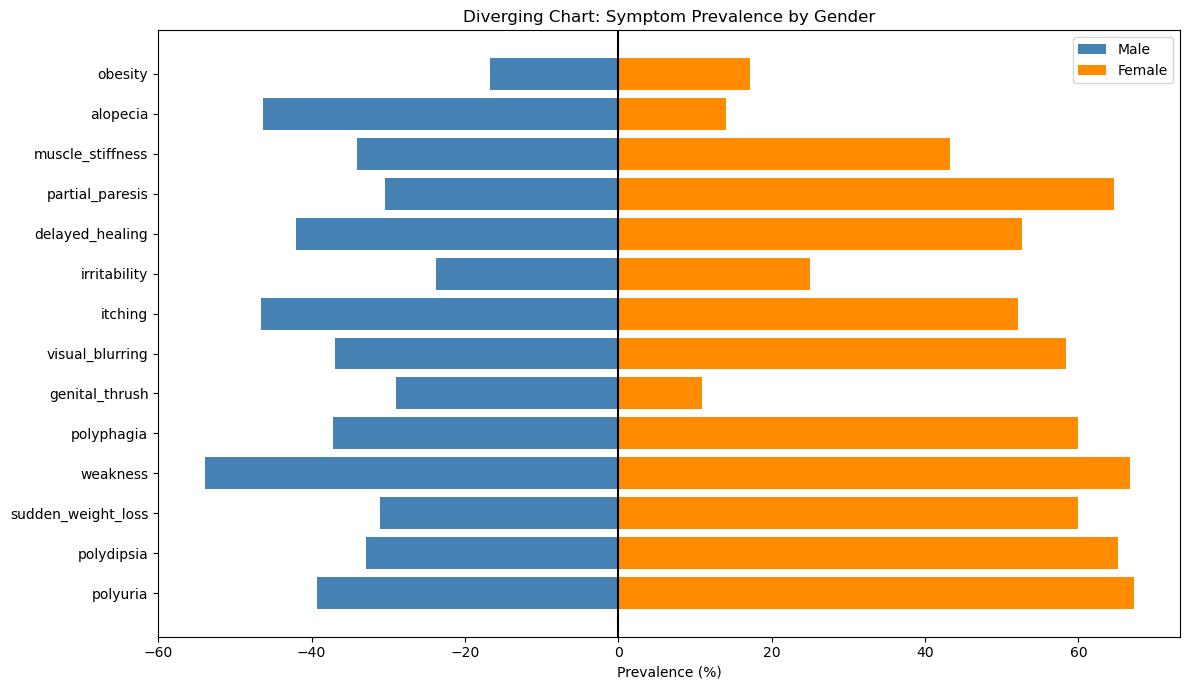

In [23]:
plt.figure(figsize=(12,7))

plt.barh(prevalence_df.index, prevalence_df["Male Prevalence (%)"] * -1, color="steelblue", label="Male")
plt.barh(prevalence_df.index, prevalence_df["Female Prevalence (%)"], color="darkorange", label="Female")

plt.xlabel("Prevalence (%)")
plt.title("Diverging Chart: Symptom Prevalence by Gender")
plt.axvline(0, color="black")
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
print("Gender-Specific Predictors: Correlation of Symptoms with POSITIVE Diagnosis")

symptom_cols = [col for col in df_male.columns if col not in ['age', 'gender', 'class']]

# Calculate Pearson correlation (r) for each symptom against the 'class' (diagnosis).
# This quantifies the linear strength of each symptom as a predictor within that gender.
male_corr = df_male[symptom_cols + ['class']].corr()['class'].drop('class')
female_corr = df_female[symptom_cols + ['class']].corr()['class'].drop('class')

# Combine correlation results
corr_df = pd.concat([male_corr.rename('Male Correlation'), 
                     female_corr.rename('Female Correlation')], axis=1)

corr_df['Absolute Difference'] = np.abs(corr_df['Male Correlation'] - corr_df['Female Correlation'])


print("  (Higher absolute value indicates a stronger linear relationship/predictor)")

print(corr_df.sort_values(by='Absolute Difference', ascending=False))





Gender-Specific Predictors: Correlation of Symptoms with POSITIVE Diagnosis
  (Higher absolute value indicates a stronger linear relationship/predictor)
                    Male Correlation  Female Correlation  Absolute Difference
alopecia                   -0.050676           -0.518202             0.467526
genital_thrush              0.316587           -0.107404             0.423991
irritability                0.403811            0.151053             0.252758
polyuria                    0.705151            0.474218             0.230933
polydipsia                  0.673103            0.452659             0.220444
weakness                    0.266585            0.061667             0.204918
delayed_healing             0.039148           -0.104977             0.144125
muscle_stiffness            0.062119            0.183562             0.121443
polyphagia                  0.257783            0.369414             0.111631
visual_blurring             0.213091            0.109086           

The gender-specific correlation analysis highlights meaningful differences in how various symptoms relate to a positive early-stage diabetes diagnosis for males versus females. Several symptoms demonstrate substantially stronger associations in one gender. For example, alopecia shows a strong negative correlation among females (–0.52) but is nearly unrelated among males, representing the largest gender gap in the dataset. Similarly, genital thrush, irritability, polyuria, and polydipsia all show noticeably stronger correlations for men, suggesting these symptoms may be more predictive of a positive diagnosis for male patients. These patterns indicate that while many symptoms are relevant across genders, the strength of their diagnostic value varies meaningfully.

On the other hand, some symptoms exhibit little gender-specific variation. Sudden weight loss, partial paresis, and polyphagia demonstrate very similar correlation patterns between males and females, indicating that these symptoms may be more universal predictors of early-stage diabetes regardless of gender. Overall, the correlation table provides an important early signal that gender-aware models or stratified screening strategies may better capture these diagnostic differences. Visualizing these variations helps reveal which symptoms drive the largest gender-based differences and where future research or model refinement could focus.